## Spatial Transcriptomics analysis of Mouse Brain Receptor Map obtained via MerFISH

In [86]:
%pip install scanpy 
%pip install squidpy 
%pip install matplotlib 
%pip install pandas 
%pip install seaborn 
%pip install watermark 
%pip install scikit-misc 
%pip install openpyxl 
%pip install stlearn
%pip install cellpose


Note: you may need to restart the kernel to use updated packages.
  Using cached pandas-2.1.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Using cached numpy-1.26.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached numpy-1.25.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Using cached numpy-1.24.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached numpy-1.23.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dep

In [87]:
%load_ext watermark
%watermark -v -p cellpose,matplotlib,numpy,pandas,scanpy,scikit-misc,seaborn,stlearn,squidpy,openpyxl

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.2
IPython version      : 8.16.1

cellpose   : 2.2.3
matplotlib : 3.8.0
numpy      : 1.21.6
pandas     : 2.0.3
scanpy     : 1.9.5
scikit-misc: not installed
seaborn    : 0.13.0
stlearn    : 0.4.12
squidpy    : 1.3.1
openpyxl   : 3.1.2



In [88]:
import os

from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import squidpy as sq
import stlearn as st
import seaborn as sns

from cellpose import models

In [145]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)
    warnings.warn("user", UserWarning)
    warnings.warn("future", FutureWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [146]:
root_path: str = "/home/user/desktop/data/mouse_data"

raw_adata = sq.read.vizgen(
    path=root_path,
    counts_file="cell_by_gene_S1R1.csv",
    meta_file="cell_metadata_S1R1.csv",
    transformation_file="micron_to_mosaic_pixel_transform.csv"
)

raw_adata.var_names_make_unique()
# raw_adata.var['mt'] = raw_adata.var_names.str.startswith("Mt-")

In [147]:
sc.pp.calculate_qc_metrics(raw_adata, percent_top=(50, 100, 200, 300), inplace=True)

In [148]:
raw_adata.obs.head()

,fov,volume,min_x,max_x,min_y,max_y,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_300_genes
110883424764611924400221639916314253469,0,432.141425,151.530484,161.596084,4264.619632,4278.033232,28,3.367296,68.0,4.234107,100.000000,100.000000,100.0,100.0
135188247894899244046039873973964001182,0,1351.802616,148.290484,164.728084,4247.663631,4266.261232,64,4.174387,177.0,5.181784,92.090395,100.000000,100.0,100.0
164766962839370328502017156371562646881,0,1080.653268,152.178484,167.752084,4220.555630,4235.805231,43,3.784190,178.0,5.187386,100.000000,100.000000,100.0,100.0
165747897693809971960756442245389760838,0,1652.000749,158.226484,176.932084,4314.191633,4333.545233,106,4.672829,398.0,5.988961,82.160804,98.492462,100.0,100.0
260943245639750847364278545493286724628,0,1343.378642,152.394484,168.724084,4301.231633,4316.373233,77,4.356709,302.0,5.713733,91.059603,100.000000,100.0,100.0


In [149]:
raw_adata.obsm["blank_genes"].to_numpy().sum() / raw_adata.var["total_counts"].sum() * 100

0.3892738837748766

<Axes: title={'center': 'Volume of segmented cells'}, xlabel='volume', ylabel='Count'>

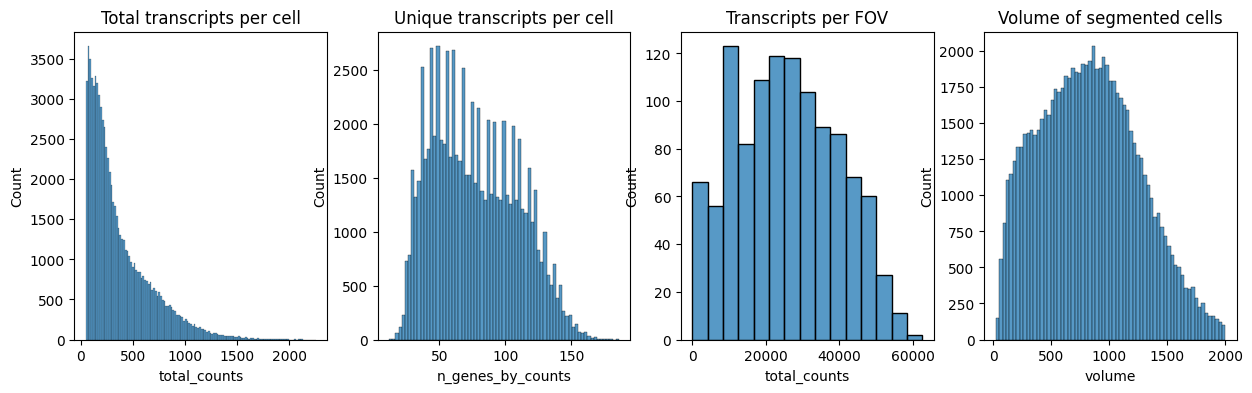

In [150]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    raw_adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    raw_adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)

axs[2].set_title("Transcripts per FOV")
sns.histplot(
    raw_adata.obs.groupby("fov").sum()["total_counts"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("Volume of segmented cells")
sns.histplot(
    raw_adata.obs["volume"],
    kde=False,
    ax=axs[3],
)

In [151]:
# Remove cells with counts below the 2nd percentile and above the 98th percentile

min_cells_percentile = int(raw_adata.obs['n_genes_by_counts'].quantile(0.02))
max_cells_percentile = int(raw_adata.obs['n_genes_by_counts'].quantile(0.98))

sc.pp.filter_cells(raw_adata, min_counts=min_cells_percentile)
sc.pp.filter_cells(raw_adata, max_counts=max_cells_percentile)

In [152]:
sc.pp.normalize_total(raw_adata, inplace=True)
sc.pp.log1p(raw_adata)
sc.pp.highly_variable_genes(raw_adata, flavor="seurat_v3", n_top_genes=4000)

/home/user/.local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:61: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [153]:
sc.pp.pca(raw_adata)
sc.pp.neighbors(raw_adata)
sc.tl.umap(raw_adata)
sc.tl.leiden(raw_adata)

/home/user/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/user/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/user/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


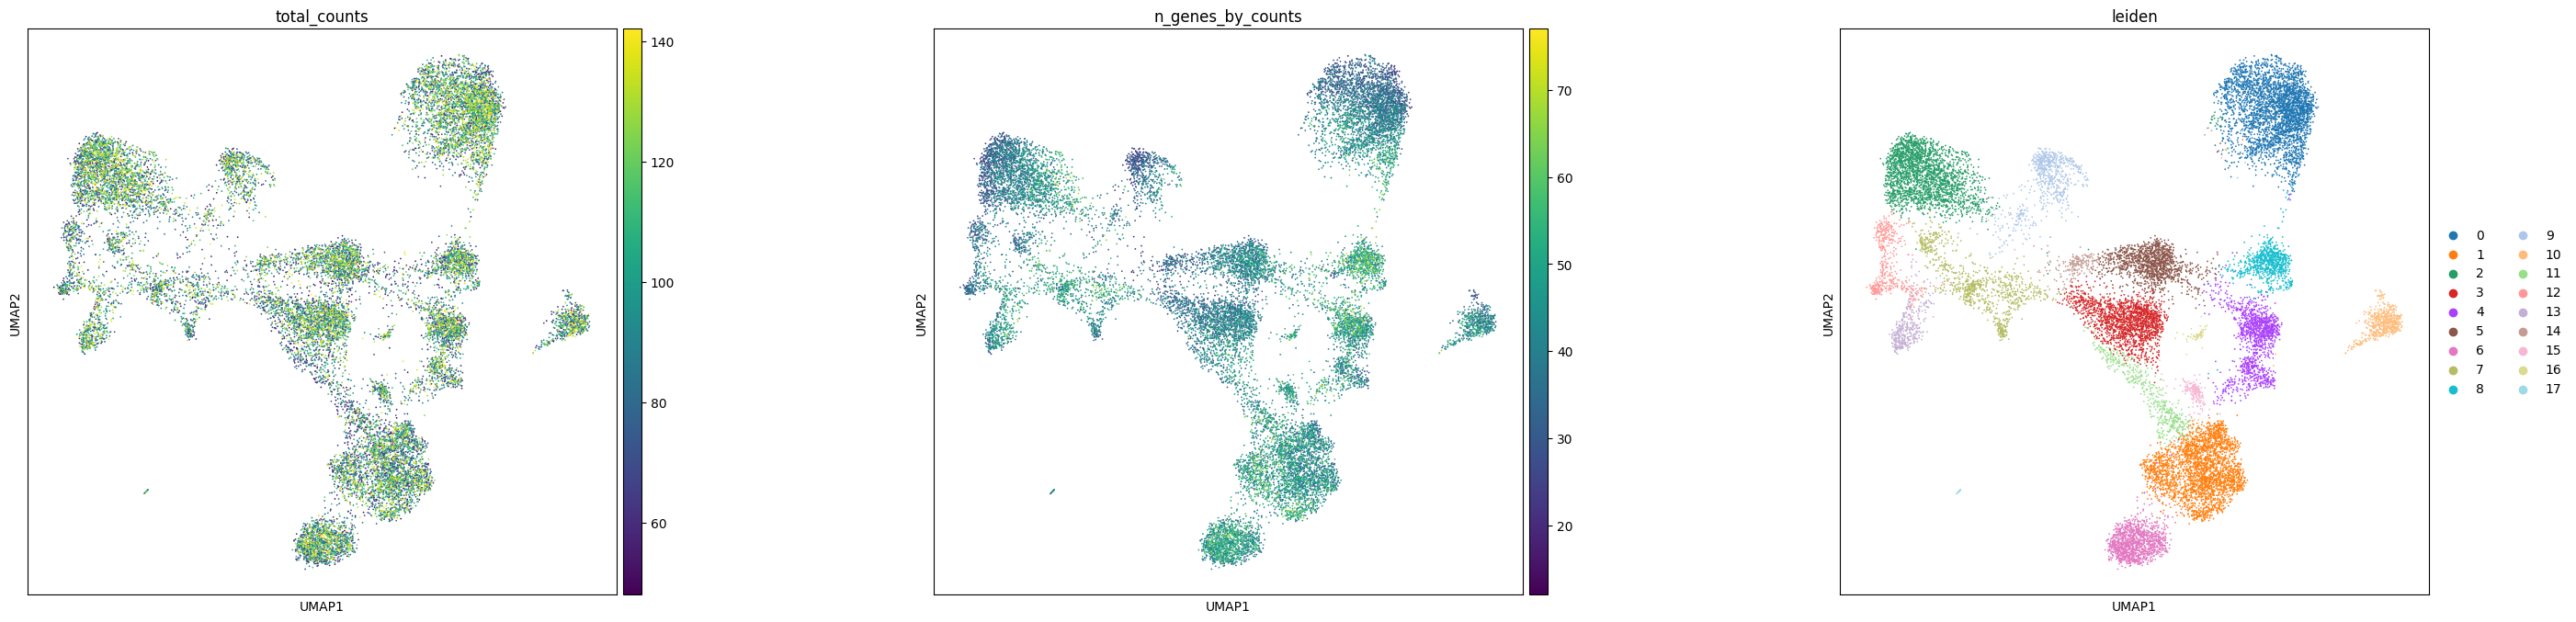

In [154]:
sc.pl.umap(
    raw_adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "leiden",
    ],
    wspace=0.4,
)

In [63]:
# Look into why the following three commands do work for MerFISH

# plt.rcParams["figure.figsize"] = (8, 8)
# sc.pl.spatial(raw_adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

In [ ]:
# sc.pl.spatial(adata, img_key="hires", color="leiden", size=1.5)

/home/user/.local/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
/home/user/.local/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
/home/user/.local/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/user/.local/lib/python3.9/site-packages/squidpy/pl/_spati

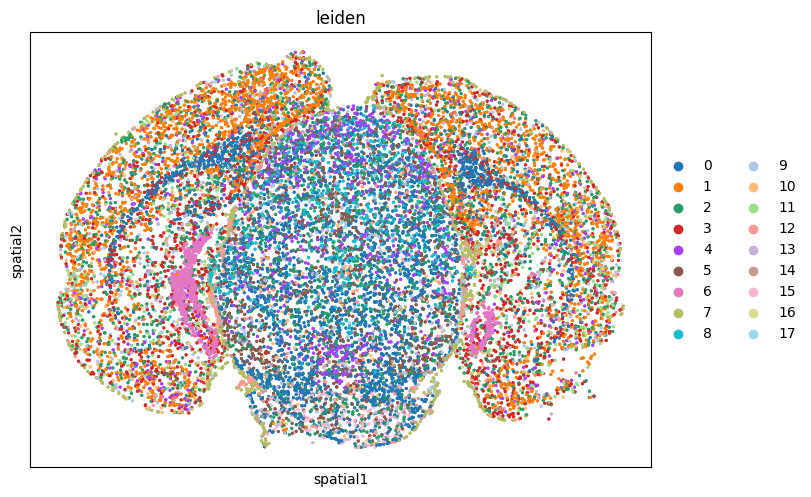

In [155]:
sq.pl.spatial_scatter(
    raw_adata,
    shape=None,
    color=[
        "leiden",
    ],
    wspace=0.4,
)

In [156]:
sc.tl.rank_genes_groups(raw_adata, 'leiden', method='wilcoxon')

/home/user/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [157]:
#convert to dataframe
results = raw_adata.uns['rank_genes_groups']
('0', '1', '2', '3', '4')

out = np.array([[0,0,0,0,0]])
for group in results['names'].dtype.names:
    out = np.vstack((out, np.vstack((results['names'][group],
                                     results['scores'][group],
                                     results['pvals_adj'][group],
                                     results['logfoldchanges'][group],
                                     np.array([group] * len(results['names'][group])).astype('object'))).T))



markers = pd.DataFrame(out[1:], columns = ['Gene', 'scores', 'pval_adj', 'lfc', 'cluster'])

markers = markers[(markers.pval_adj < 0.05) & (abs(markers.lfc) > 1)]

In [158]:
markers.head()

,Gene,scores,pval_adj,lfc,cluster
0,Gjc3,88.957085,0.0,6.139115,0
1,Gprc5b,84.787689,0.0,3.318716,0
2,Olig1,84.173981,0.0,4.576201,0
3,Fgfr2,79.158073,0.0,4.280194,0
4,Ddr1,75.293968,0.0,3.833174,0


### Build the spatial graph

In [159]:
sq.gr.spatial_neighbors(raw_adata, coord_type="generic", delaunay=True)

### Compute Centrality Scores

In [160]:
sq.gr.centrality_scores(raw_adata, cluster_key="leiden")

/home/user/.local/lib/python3.9/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):


/home/user/.local/lib/python3.9/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):


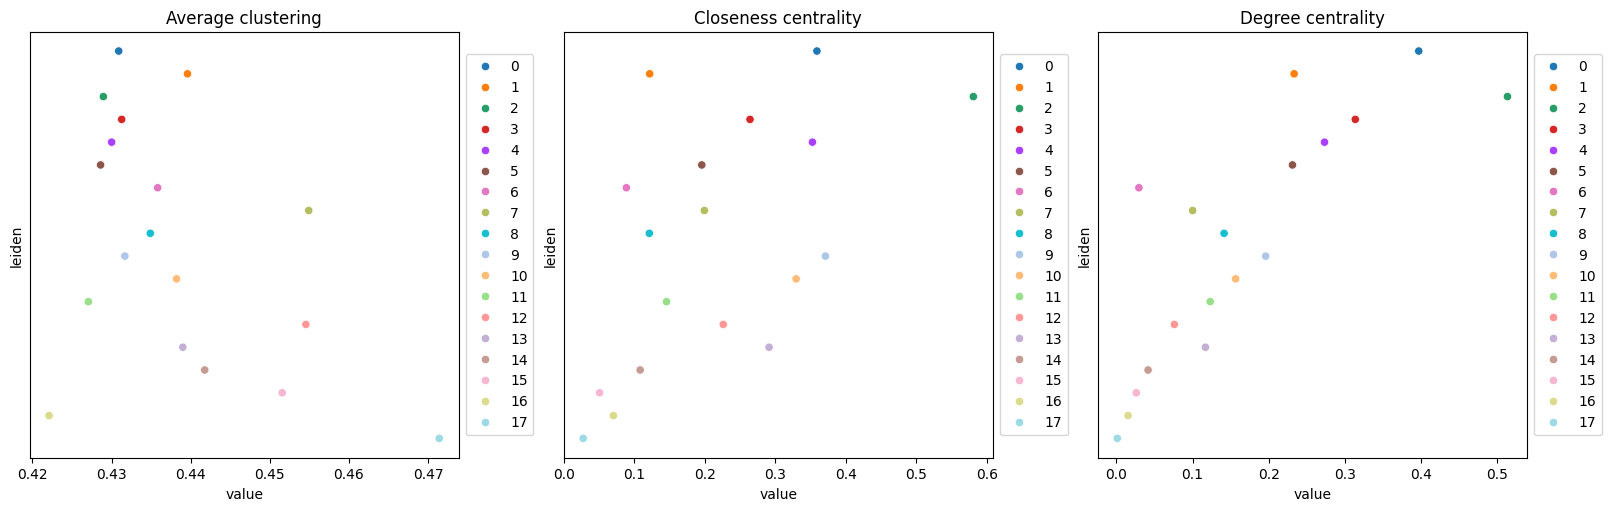

In [161]:
sq.pl.centrality_scores(raw_adata, cluster_key="leiden", figsize=(16, 5))

### Compute Co-occurence probability

In [162]:
adata_subsample = sc.pp.subsample(raw_adata, fraction=0.5, copy=True)

/home/user/.local/lib/python3.9/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
100%|██████████| 1/1 [00:11<00:00, 11.46s/]
/home/user/.local/lib/python3.9/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):


/home/user/.local/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
/home/user/.local/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
/home/user/.local/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/user/.local/lib/python3.9/site-packages/squidpy/pl/_spati

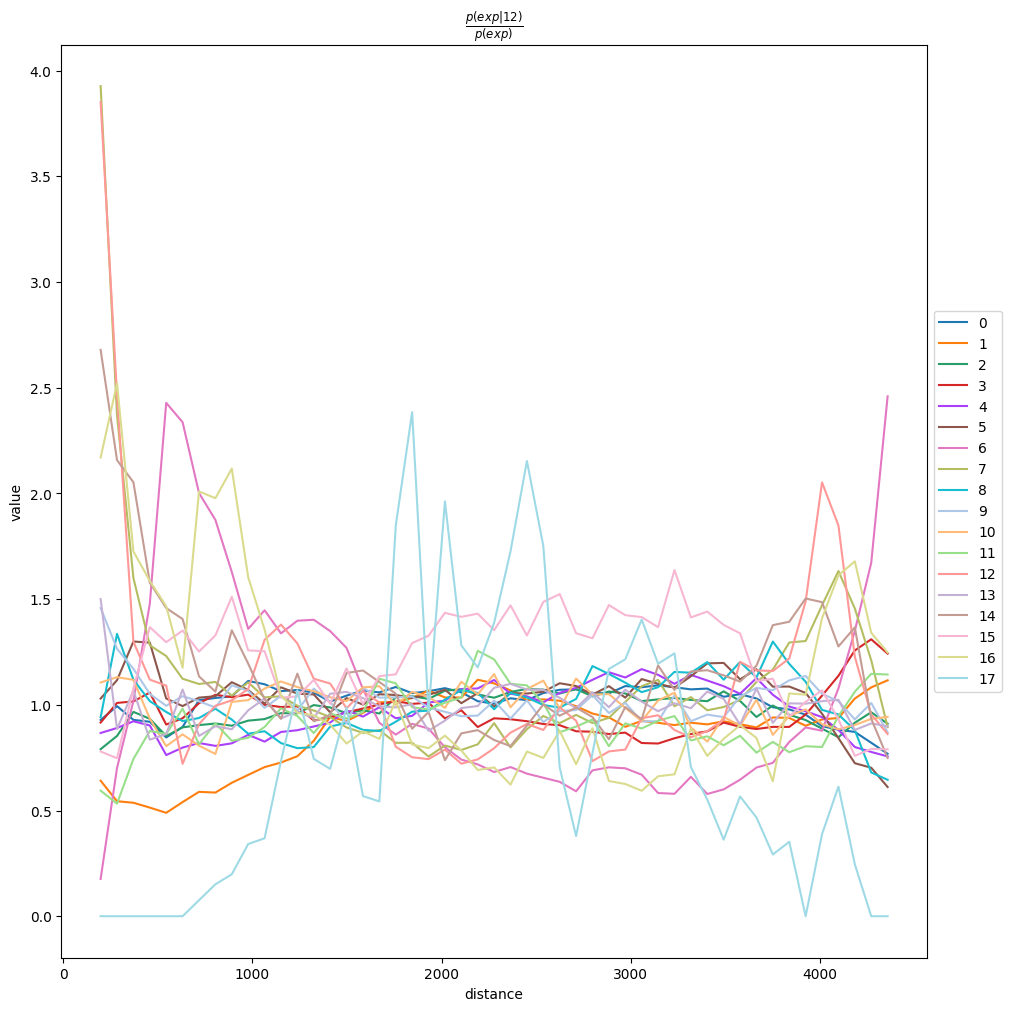

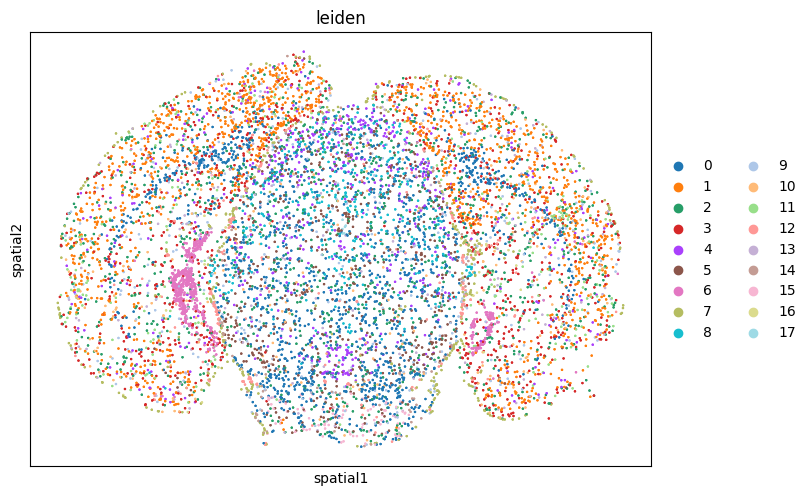

In [163]:
sq.gr.co_occurrence(
    adata_subsample,
    cluster_key="leiden",
)
sq.pl.co_occurrence(
    adata_subsample,
    cluster_key="leiden",
    clusters="12",
    figsize=(10, 10),
)
sq.pl.spatial_scatter(
    adata_subsample,
    color="leiden",
    shape=None,
    size=2,
)

### Neighbourhood Enrichment

In [164]:
sq.gr.nhood_enrichment(raw_adata, cluster_key="leiden")

/home/user/.local/lib/python3.9/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
  3%|▎         | 31/1000 [00:00<00:03, 309.72/s]

100%|██████████| 1000/1000 [00:01<00:00, 515.59/s]


/home/user/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/user/.local/lib/python3.9/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
/home/user/.local/lib/python3.9/site-packages/squidpy/pl/_utils.py:556: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_labels = adata.obs[key][row_order]


/home/user/.local/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
/home/user/.local/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
/home/user/.local/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/user/.local/lib/python3.9/site-packages/squidpy/pl/_spati

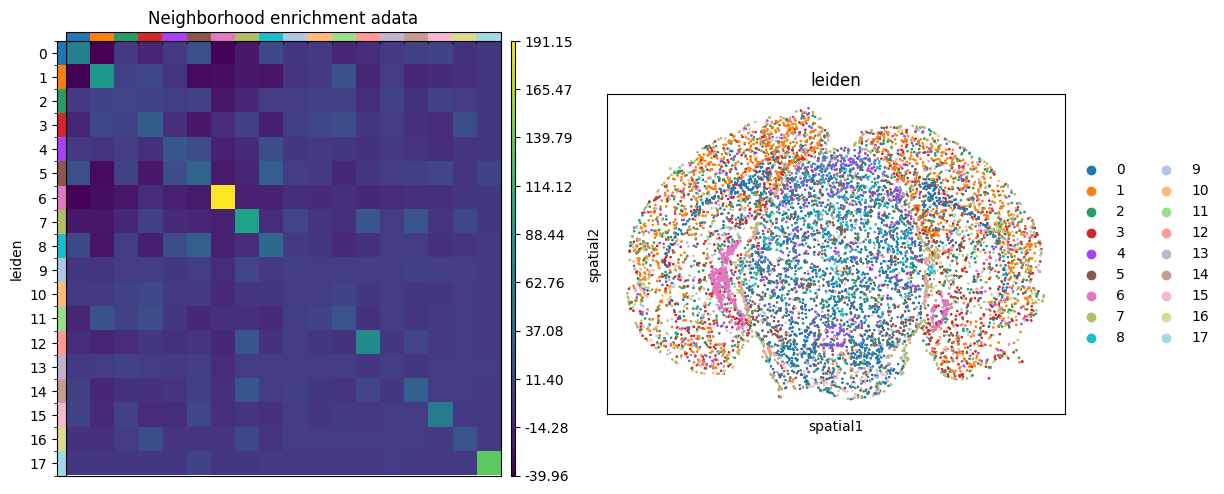

In [165]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))
sq.pl.nhood_enrichment(
    raw_adata,
    cluster_key="leiden",
    figsize=(8, 8),
    title="Neighborhood enrichment adata",
    ax=ax[0],
)
sq.pl.spatial_scatter(adata_subsample, color="leiden", shape=None, size=2, ax=ax[1])

### Ripley's Statistics

/home/user/.local/lib/python3.9/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
/home/user/.local/lib/python3.9/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):


/home/user/.local/lib/python3.9/site-packages/squidpy/pl/_graph.py:317: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(y="stats", x="bins", ci="sd", alpha=0.01, color="gray", data=res["sims_stat"], ax=ax)
/home/user/.local/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
/home/user/.local/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:388: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if key not in adata.obs or not is_categorical_dtype(adata.obs[key]):
/home/user/.local/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be remov

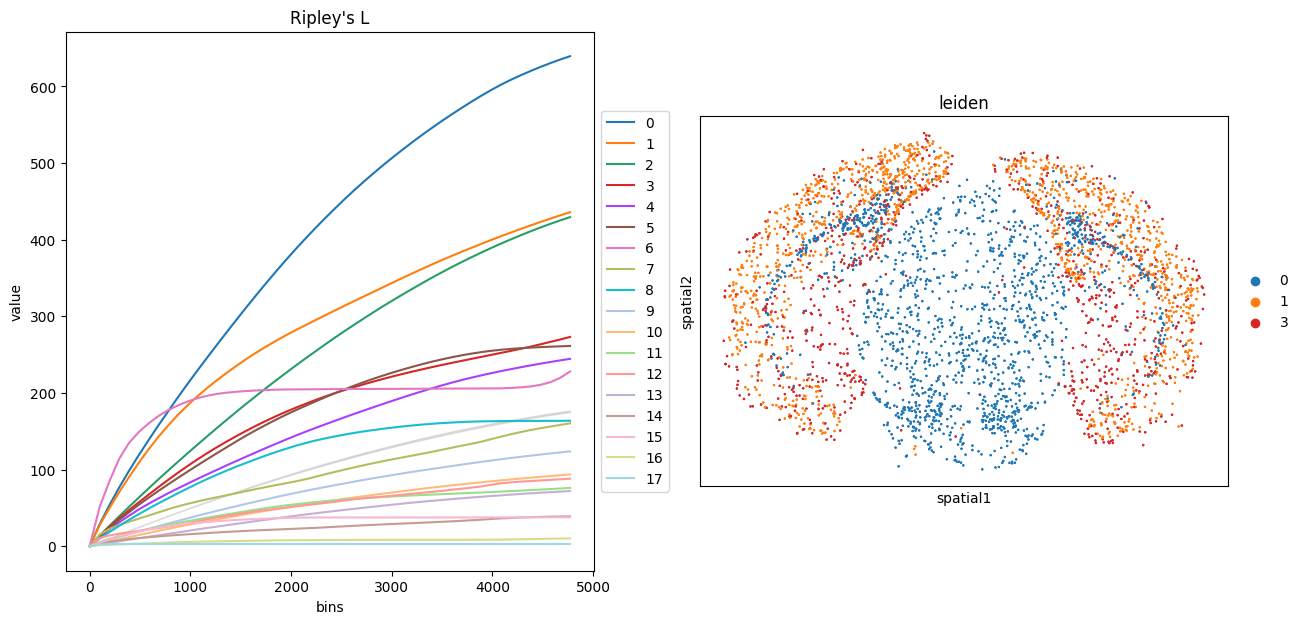

In [166]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
mode = "L"

sq.gr.ripley(raw_adata, cluster_key="leiden", mode=mode)
sq.pl.ripley(raw_adata, cluster_key="leiden", mode=mode, ax=ax[0])

sq.pl.spatial_scatter(
    adata_subsample,
    color="leiden",
    groups=["0", "1", "3"],
    shape=None,
    size=2,
    ax=ax[1],
)

### Moran's I score 

In [167]:
sq.gr.spatial_neighbors(adata_subsample, coord_type="generic", delaunay=True)
sq.gr.spatial_autocorr(
    adata_subsample,
    mode="moran",
    n_perms=100,
    n_jobs=1,
)
adata_subsample.uns["moranI"].head(10)

/home/user/.local/lib/python3.9/site-packages/scanpy/metrics/_gearys_c.py:293: UserWarning: 1 variables were constant, will return nan for these.
  warnings.warn(
100%|██████████| 100/100 [00:50<00:00,  2.00/s]


,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
Slc17a7,0.534329,0.0,0.000037,0.0,0.009901,0.000058,NaN,NaN,0.015133
Gfap,0.436361,0.0,0.000037,0.0,0.009901,0.000064,NaN,NaN,0.015133
Baiap2,0.375549,0.0,0.000037,0.0,0.009901,0.000052,NaN,NaN,0.015133
Mas1,0.374739,0.0,0.000037,0.0,0.009901,0.000057,NaN,NaN,0.015133
Chrm1,0.357129,0.0,0.000037,0.0,0.009901,0.000045,NaN,NaN,0.015133
Myh11,0.325991,0.0,0.000037,0.0,0.009901,0.000030,NaN,NaN,0.015133
Grin2b,0.305718,0.0,0.000037,0.0,0.009901,0.000049,NaN,NaN,0.015133
Gjc3,0.301602,0.0,0.000037,0.0,0.009901,0.000044,NaN,NaN,0.015133
Chat,0.288653,0.0,0.000037,0.0,0.009901,0.000021,NaN,NaN,0.015133
Grm5,0.282615,0.0,0.000037,0.0,0.009901,0.000046,NaN,NaN,0.015133


## Trajectory Analysis

In [141]:
from openpyxl import Workbook
import csv


wb = Workbook()
ws = wb.active
with open(os.path.join(root_path, "cell_metadata_S1R1.csv"), 'r') as f:
    for row in csv.reader(f):
        ws.append(row)
wb.save(os.path.join(root_path, "cell_metadata_S1R1.xlsx"))

In [144]:
# st_adata = st.ReadMERFISH(
#     count_matrix_file=os.path.join(root_path, "cell_by_gene_S1R1.csv"),
#     spatial_file=os.path.join(root_path, "cell_metadata_S1R1.csv")
# )

### Cell Segmentation

In [ ]:
def cellpose(img, min_size=15):
    model = models.Cellpose(model_type="nuclei")
    res, _, _, _ = model.eval(
        img,
        channels=[0, 0],
        diameter=None,
        min_size=min_size,
    )
    return res